In [ ]:
# All IMPORTS you may need! 

import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


**KNN on Audio Drum Data**

One key to designing a k-nearest neighbor model is a good choice of the distance metric. By
working through these examples (in order), you will overcome a few challenges in applying distances
to datasets. Use scikit-learn’s neighbors. `KNeighborsClassifier` to train a classifier on each of the
provided datasets.
For all three datasets, because they are small in size, you will use most of the data for training.
For all model, do a cross-validation split using:

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)`

Load the Drum sounds dataset. Remember that these data are vectors, and each value is the
amount of power (signal intensity) at that particular frequency. Use the distance metric euclidean.
Next, staying with the Euclidean metric, increase the number of neighbors from1 to 9, only using
odd numbers. Save the accuracy at each value of k, and you will be plotting them later. Change
the distance metric to Manhattan distance. Again, vary the number of numbers and plot results
for accuracy using both distance metrics on the Drum dataset. Plot both the training and test set
errors as below.

*2.1 Euclidean Distance*

In [ ]:
#Load Audio dataset  here
audio_df = pd.read_csv('/content/audio_data.csv')


In [ ]:
X = audio_df.iloc[:,4:audio_df.shape[1]]
y = audio_df['label']

In [ ]:
#Split the data into train and test, random state= 42 and 90% of data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
# Scale Data for KNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*KNN with k ∈ [1, 9]*

In [ ]:
#This function is supposed to create and test a KNN model

def k_neighbors(xtrain, ytrain, xtest, ytest, kvalues, metric):
  knn_accuracy = []
  clfs = []
  for i in kvalues:
    clf = KNeighborsClassifier(metric=metric, n_neighbors=i).fit(xtrain, ytrain)
    clf_train_pred = clf.predict(xtrain)
    clf_test_pred = clf.predict(xtest)
    clfs.append(clf)
    knn_accuracy.append({'k values': i,
    'Training Accuracy':accuracy_score(clf_train_pred,ytrain),
    'Test Accuracy': accuracy_score(clf_test_pred,ytest)})
  return pd.DataFrame(knn_accuracy), clfs

*KNN using L2 norm*

In [ ]:
knn_euc_acc, knn_euc_clfs = k_neighbors(X_train, y_train, X_test, y_test,range(1,10,2), 'euclidean')  
display(knn_euc_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,1.000000
1,3,0.978947,0.954545
2,5,0.978947,0.954545
3,7,0.978947,0.954545
4,9,0.978947,0.954545


K*NN L2 norm with k ∈ [0, 9] Accuracy plot*

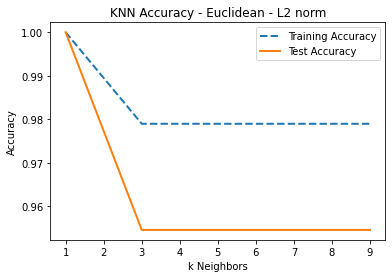

In [ ]:
plt.plot(knn_euc_acc['k values'], knn_euc_acc['Training Accuracy'], '--',linewidth=2, label='Training Accuracy')
plt.plot(knn_euc_acc['k values'], knn_euc_acc['Test Accuracy'], '-',linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - Euclidean - L2 norm')
plt.legend()
plt.show()

**2.2 Manhattan Distance**

*KNN using L1 norm*

In [ ]:
# Repeat same model this time with 'manhatan'
knn_man_acc, knn_man_clfs = k_neighbors(X_train, y_train, X_test, y_test,range(1,10,2), 'manhattan')   
display(knn_man_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.954545
1,3,0.978947,0.954545
2,5,0.978947,0.954545
3,7,0.978947,0.954545
4,9,0.978947,0.954545


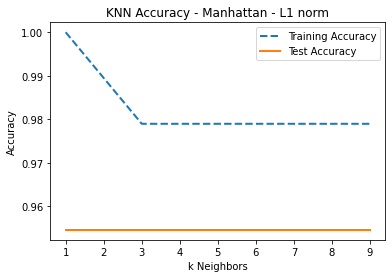

In [ ]:
#KNN L1 norm with k ∈ [0, 9] Accuracy plot here
plt.plot(knn_man_acc['k values'], knn_man_acc['Training Accuracy'], '--',linewidth=2, label='Training Accuracy')
plt.plot(knn_man_acc['k values'], knn_man_acc['Test Accuracy'], '-',linewidth=2, label='Test Accuracy')
# Repeat the same plot as above but this time for test accutracy
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - Manhattan - L1 norm')
plt.legend()
plt.show()

**3 KNN on Animal Shelter Data** 

Next, you will try the animal shelter data. To convert these categorical features to a vector, use
`enc = OneHotEncoder(sparse=‘False’)`. Read the documentation on what `oneHotEncoder` is doing,
and note how large the transformed data are. Plot a graph of accuracy using k varying from 1 to
9 and using Cosine as the distance.

In [ ]:
# Read the Shelter dataset
Shelter_df = pd.read_csv('/content/shelter_data.csv')

In [ ]:
# Drop null values on Anima Data
shelter_df = Shelter_df.dropna()

# Define y as 'OutcomeType' and X as {'DateTime', 'AnimalType', 'SexuponOutcome','AgeuponOutcome', 'Breed', 'Color'} (Dropped Name)
y = shelter_df['OutcomeType']
X = shelter_df[['DateTime', 'AnimalType', 'SexuponOutcome','AgeuponOutcome', 'Breed', 'Color']]

# one-hot encode
ohe = OneHotEncoder(sparse=False).fit(X[['AnimalType', 'SexuponOutcome',
'Breed', 'Color']])

# ordinal
ord = OrdinalEncoder().fit(X[['DateTime', 'AgeuponOutcome']])
cat_df = pd.DataFrame(ohe.transform(X[['AnimalType', 'SexuponOutcome',
'Breed', 'Color']]),
columns=ohe.get_feature_names_out(['AnimalType',
'SexuponOutcome', 'Breed','Color']))
ord_df = pd.DataFrame(ord.transform(X[['DateTime', 'AgeuponOutcome']]),
columns=['DateTime', 'AgeuponOutcome'])

# concat the categoricals and ordinals
x = pd.concat([cat_df, ord_df], axis=1)
le = LabelEncoder()
y = le.fit(y).transform(y)

# split data to 90% for training with the random state of 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)



*Cosine Distance*

In [ ]:
# Same as previous steps, KNN Cosine Similarity with k ∈ [0, 9] Accuracy plot

In [ ]:
knn_cos_acc, knn_cos_clfs = k_neighbors(X_train, y_train, X_test, y_test,range(1,9), 'cosine')   
display(knn_cos_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.577364
1,2,0.799236,0.514327
2,3,0.779175,0.604585
3,4,0.752906,0.604585
4,5,0.737781,0.613181
5,6,0.728069,0.617479
6,7,0.719312,0.634670
7,8,0.717720,0.640401


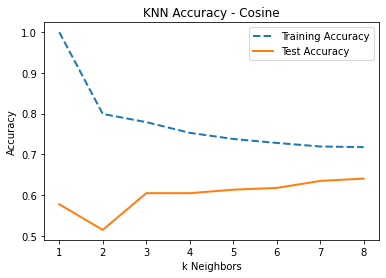

In [ ]:
#KNN cosine with k ∈ [0, 9] Accuracy plot here
plt.plot(knn_cos_acc['k values'], knn_cos_acc['Training Accuracy'], '--',linewidth=2, label='Training Accuracy')
plt.plot(knn_cos_acc['k values'], knn_cos_acc['Test Accuracy'], '-',linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - Cosine')
plt.legend()
plt.show()

**4 KNN on Text Data**

Finally, load the text data using count_hamilton.csv. You will again use k-nearest neighbors to
build a classifier, varying the number of neighbors from 1 to 9. Use both Cosine and Euclidean
distance to plot accuracy as the number of neighbors increases.

In [ ]:
# Read text data
Text_df = pd.read_csv('/content/count_hamilton_data.csv')


In [ ]:
# Drop meta_title
text_df = Text_df.drop(['meta_title'],axis =1)
X = text_df.iloc[:, 2:text_df.shape[1]]

# Encode Label
le = preprocessing.LabelEncoder()
labels = text_df['meta_author']
le.fit(labels)
y=le.transform(labels)

#create 90% of data for training in random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)



**4.1 Euclidean Distance**

KNN L2 norm

In [ ]:
# Same strategy as before, create euclidean for the range of K
knn_euc_acc, knn_euc_clfs = k_neighbors(X_train, y_train, X_test, y_test,range(1,9), 'euclidean')  
display(knn_euc_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.777778
1,2,0.828947,0.777778
2,3,0.868421,0.777778
3,4,0.723684,0.777778
4,5,0.723684,0.888889
5,6,0.710526,0.777778
6,7,0.736842,0.888889
7,8,0.710526,0.777778


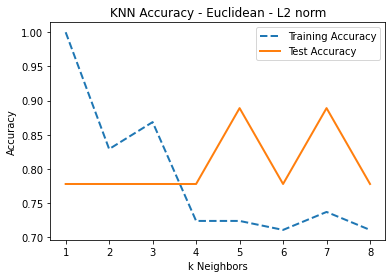

In [ ]:
#KNN L2 norm with k ∈ [0, 9] Accuracy plot
plt.plot(knn_euc_acc['k values'], knn_euc_acc['Training Accuracy'], '--',linewidth=2, label='Training Accuracy')
plt.plot(knn_euc_acc['k values'], knn_euc_acc['Test Accuracy'], '-',linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - Euclidean - L2 norm')
plt.legend()
plt.show()

**4.2 Cosine**

KNN Cosine similarity

In [ ]:
# Same strategy as before, create cosine for the range of K
knn_cos_acc, knn_cos_clfs = k_neighbors(X_train, y_train, X_test, y_test,range(1,9), 'cosine')   
display(knn_cos_acc)

,k values,Training Accuracy,Test Accuracy
0,1,1.000000,0.777778
1,2,0.934211,0.888889
2,3,0.934211,0.777778
3,4,0.934211,0.777778
4,5,0.842105,0.777778
5,6,0.868421,0.777778
6,7,0.828947,0.666667
7,8,0.855263,0.666667


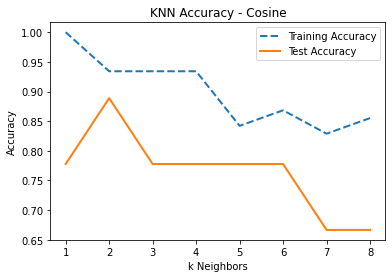

In [ ]:
#KNN L2 norm with k ∈ [0, 9] Accuracy plot
plt.plot(knn_cos_acc['k values'], knn_cos_acc['Training Accuracy'], '--',linewidth=2, label='Training Accuracy')
plt.plot(knn_cos_acc['k values'], knn_cos_acc['Test Accuracy'], '-',linewidth=2, label='Test Accuracy')
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy - Cosine')
plt.legend()
plt.show()